# INTRODUCTION

### Question 3: 
Every day, hot dog vendors at Citi Field are randomly assigned sections of the stadium for which they are responsible. 

As the manager of gameday operations, you’ve always felt that some of them are more effective than others at driving demand from fans and you want to identify the best salespeople. You receive the attached dataset which shows for each game and section of the stadium the vendor assigned to that area, the day of the week (1 = Sunday, 2 = Monday, etc.), and the number of hot dogs that were sold. 

Develop a model that you can use to rank vendors’ sales abilities and provide the rankings along with the code you used to generate your model.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Import the given citi vendors data and store it as a DataFrame

In [2]:
vendor_data = pd.read_csv('data/Q3_citi_vendors.csv')

Lets now take a look at the data that was given to us

In [3]:
vendor_data

,game,day,section,vendor,hot_dogs_sold
0,1,2,1,6,145
1,1,2,2,10,121
2,1,2,3,21,56
3,1,2,4,8,123
4,1,2,5,4,100
...,...,...,...,...,...
1615,81,5,16,16,112
1616,81,5,17,11,92
1617,81,5,18,5,138
1618,81,5,19,23,67


We see from the above DataFrame that we are given the amount of hot dogs that were sold for each specific game, the day of the week the game was played, and which section of the park for each vendor.

Lets make some box plots to visually show the distribution of numerical data.

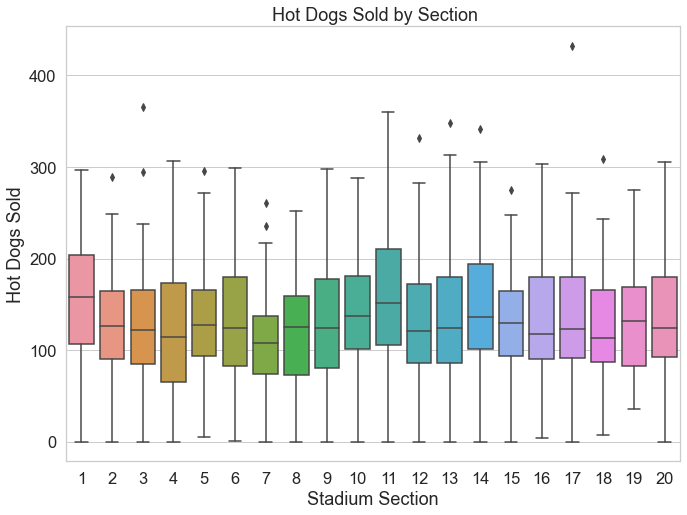

In [4]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x="section", y="hot_dogs_sold", data=vendor_data)
plt.title(' Hot Dogs Sold by Section')
plt.xlabel('Stadium Section')
plt.ylabel('Hot Dogs Sold')

plt.show()

For the most part,there is not much of a different in the distribution between the Stadium Sections and Hot Dogs Sold.

Lets see if it would be the same case for the distribution between Vendors and Hot Dogs Sold.

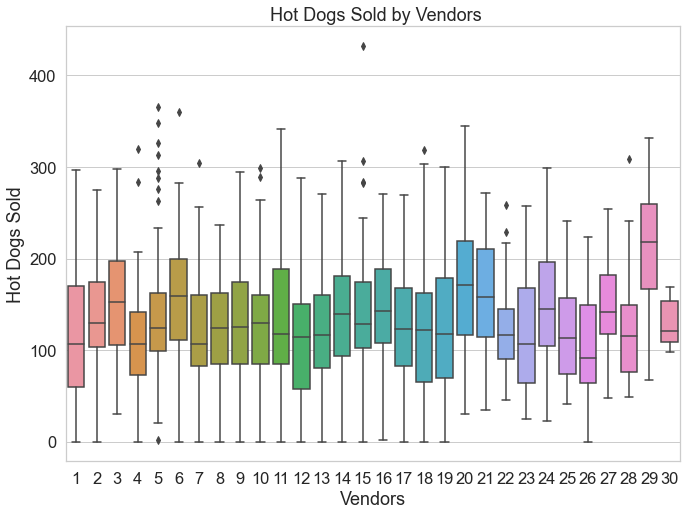

In [5]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x="vendor", y="hot_dogs_sold", data=vendor_data)
plt.title(' Hot Dogs Sold by Vendors')
plt.xlabel('Vendors')
plt.ylabel('Hot Dogs Sold')

plt.show()

Lets check to see if there are any correlations between the feautures.

In [6]:
corr = vendor_data.corr()
corr.style.background_gradient().set_precision(3)

,game,day,section,vendor,hot_dogs_sold
game,1.000,0.001,0.000,-0.021,-0.008
day,0.001,1.000,0.000,-0.019,0.216
section,0.000,0.000,1.000,0.103,0.022
vendor,-0.021,-0.019,0.103,1.000,0.035
hot_dogs_sold,-0.008,0.216,0.022,0.035,1.000


The game number does not seem to play into how many hot dogs vendor sell. We will drop that feature.

From the table we do see theres a slight correlation between vendors and section, and the day of the week and the amount of hot dogs sold. 

Lets look deeper into those correlations by visualizing the data with Bar Plots

In [7]:
#Drop Game and Section columns to look into the amount of hot dogs sold based on vendors and day of the week
vendor_data_day = vendor_data.drop(['game','section'], axis=1)

#Drop Game and Section columns to look into the amount of hot dogs sold based on vendors and section
vendor_data_section = vendor_data.drop(['game','day'], axis=1)

In [8]:
#Group data by day of week and vendor. See how many hot dogs sold. 
df1 = vendor_data_day.groupby(['day', 'vendor']).hot_dogs_sold.sum()
df1

day  vendor
1    1          992
     2          956
     3         1677
     4          954
     5          964
               ... 
7    23         417
     24        1166
     25         283
     26         539
     27         333
Name: hot_dogs_sold, Length: 201, dtype: int64

In [9]:
#Group data by section and vendor. See how many hot dogs sold. 
df2 = vendor_data_section.groupby(['section', 'vendor']).hot_dogs_sold.sum()
df2

section  vendor
1        1          596
         2         1288
         3          427
         4          430
         5          150
                   ... 
20       24         489
         25         290
         26         233
         27         123
         30         218
Name: hot_dogs_sold, Length: 493, dtype: int64

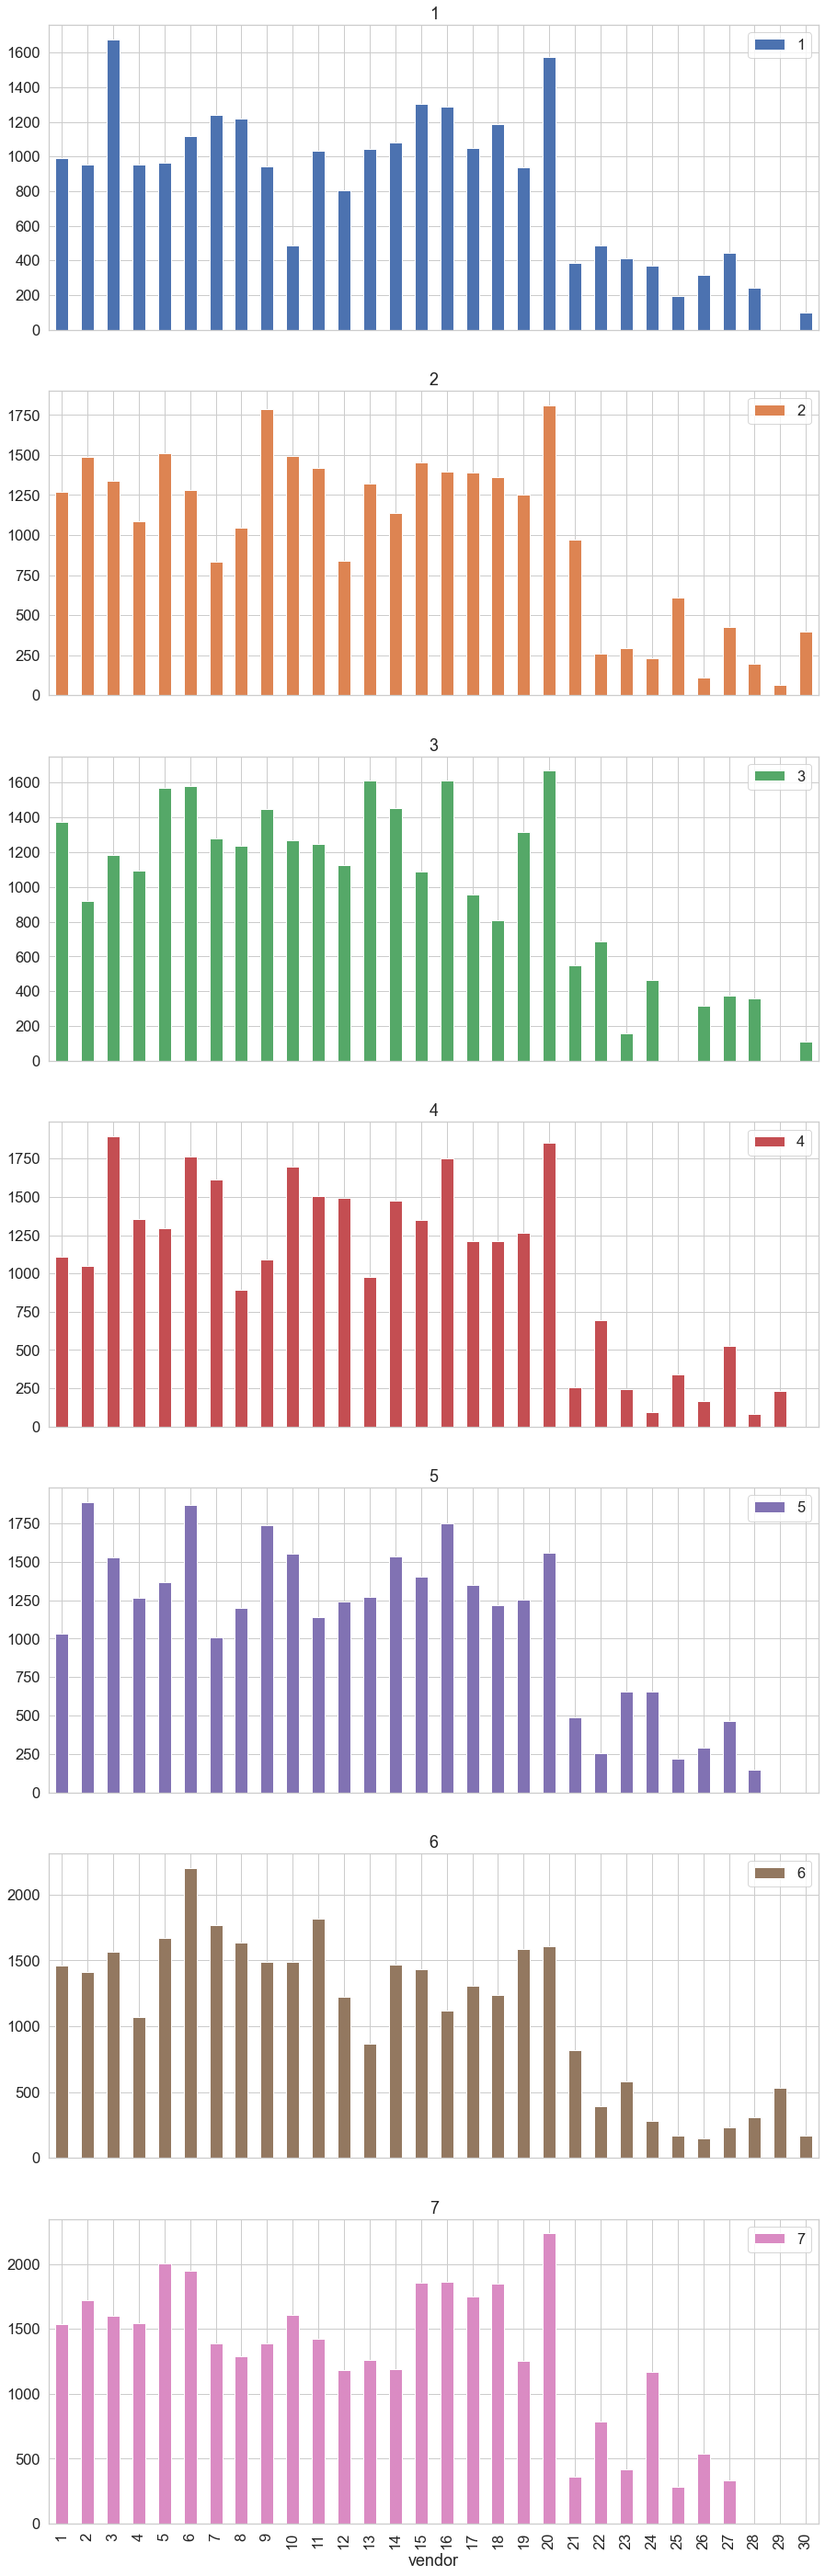

In [10]:
plt = df1.unstack(level=0).plot(kind='bar', subplots=True, figsize=(15,50))

We see from the visualizations above that there are some huge disparities in total hot dogs sold amoung the vendors. 
The vendors individually sell approximately the same amount of hot dogs no matter the day of the week. 

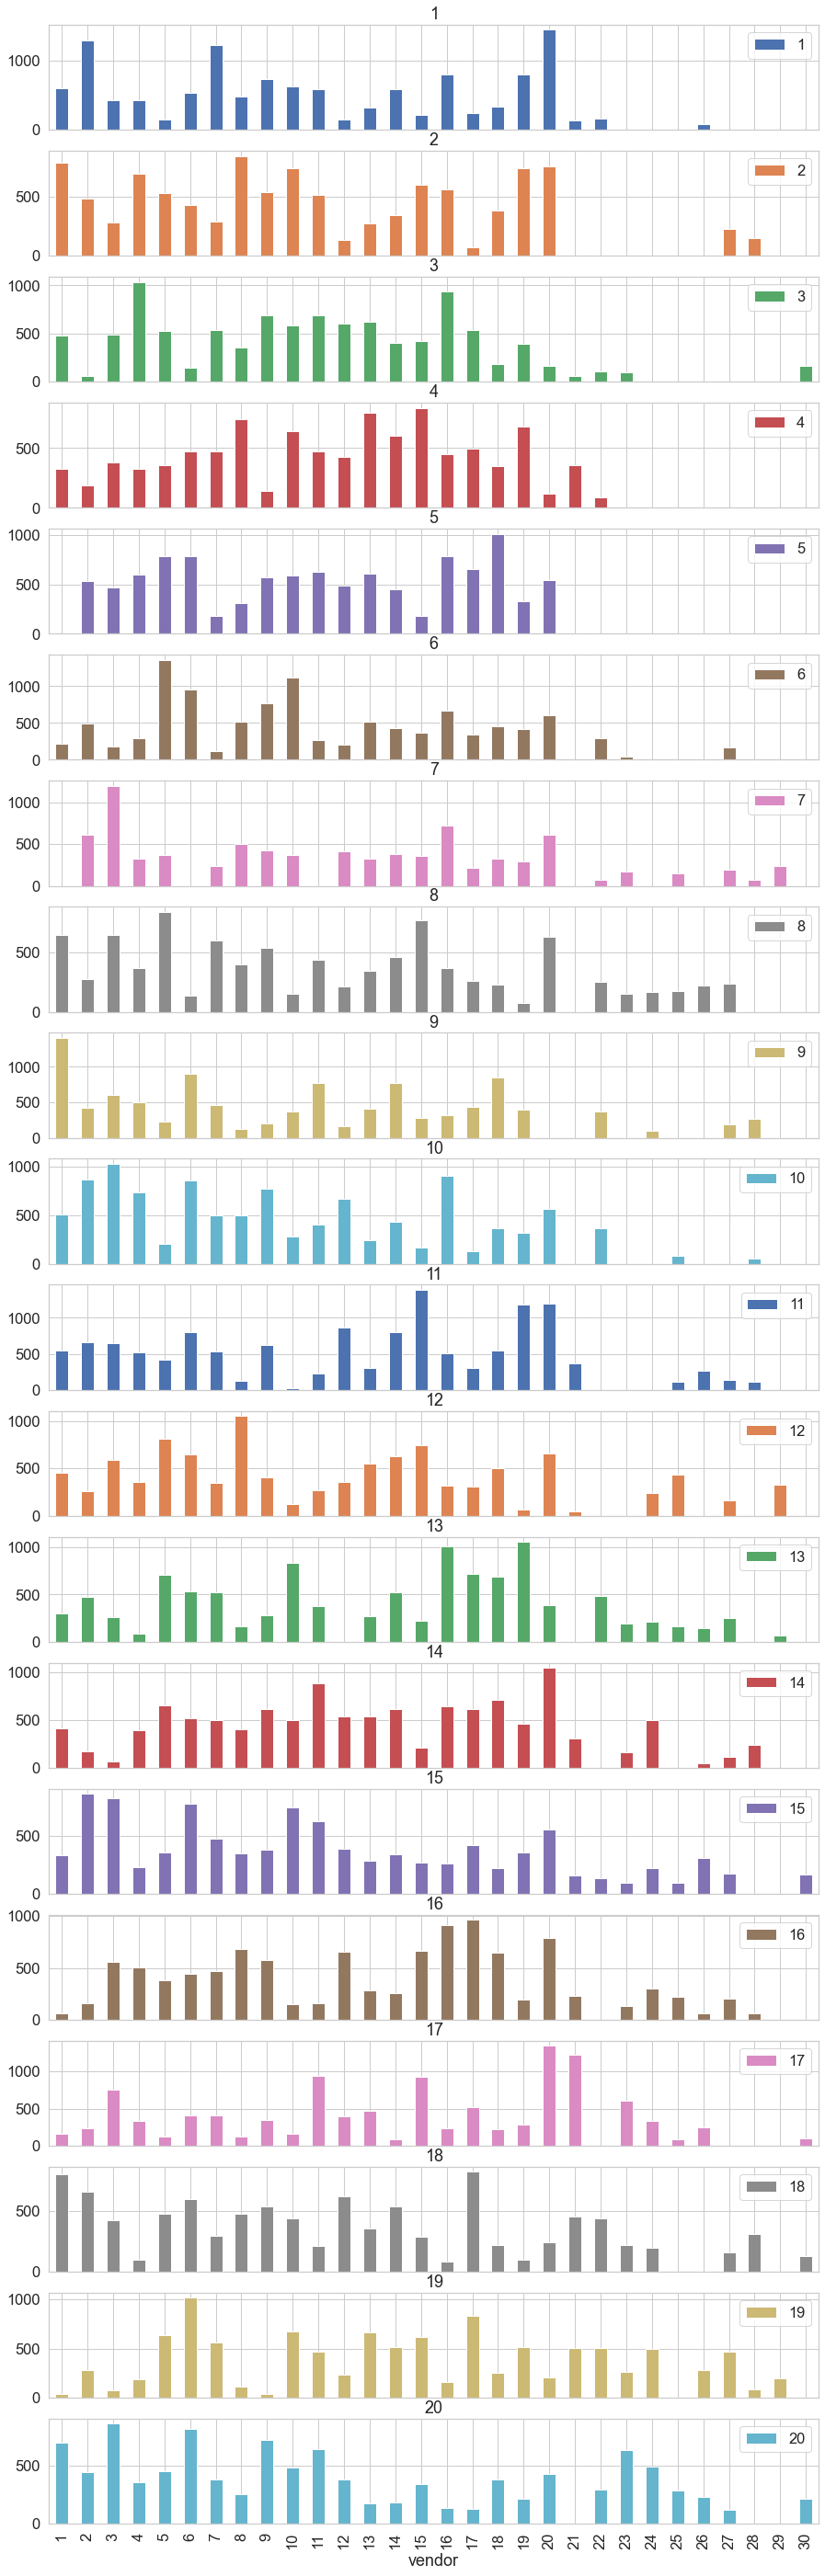

In [11]:
plt = df2.unstack(level=0).plot(kind='bar', subplots=True, figsize=(15,50))

This visualizations tells us a different story than the previous one. Some vendors sell significantly more hot
dogs depending on the section. 

One interesting thing to point out is that the top and lowest vendors per section are usually the same ones. 

After looking at both of the visualizations, I believe it is only fair to judge who are the best vendors based on the avgerage amount of hot dogs they sell per game. 

Lets make a bar plot to see how many total hot dogs each vendor has sold throughout the 81 games played.

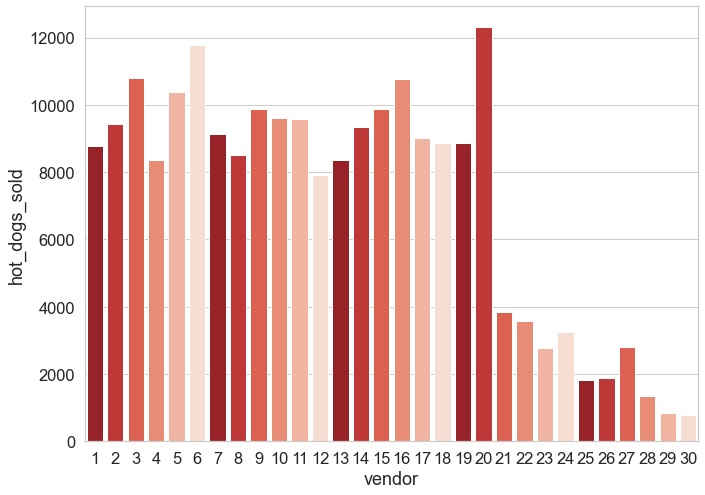

In [12]:
top_vendors = vendor_data.groupby(by=['vendor'])['hot_dogs_sold'].sum().reset_index()
sns.barplot(y='hot_dogs_sold', x='vendor', data=top_vendors, palette=sns.color_palette("Reds_r"));


In [17]:
#find the average amount of hot dogs sold per game
top_vendors['hot_dogs_per_game'] = top_vendors['hot_dogs_sold']/81
top_vendors.set_index('vendor', inplace = True)

In [18]:
print(top_vendors.sort_values('hot_dogs_per_game', ascending=False)[['hot_dogs_sold', 'hot_dogs_per_game']])

        hot_dogs_sold  hot_dogs_per_game
vendor                                  
20              12311         151.987654
6               11768         145.283951
3               10789         133.197531
16              10780         133.086420
5               10379         128.135802
9                9885         122.037037
15               9880         121.975309
10               9600         118.518519
11               9587         118.358025
2                9435         116.481481
14               9341         115.320988
7                9128         112.691358
17               9012         111.259259
19               8876         109.580247
18               8873         109.543210
1                8780         108.395062
8                8521         105.197531
4                8376         103.407407
13               8359         103.197531
12               7918          97.753086
21               3834          47.333333
22               3570          44.074074
24              